<a href="https://colab.research.google.com/github/rithakith/94-Rithara-Kithmanthie/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np

Loading merge.csv file to dataframe df

In [139]:
df= pd.read_csv('merge.csv');
print(df.head())

      customer_code     transaction_time   item code  sales_quantity  \
0  customer_code_78  2023-01-03 13:49:00  item_cd_12            13.0   
1  customer_code_78  2023-01-12 08:08:00   item_cd_6            14.0   
2  customer_code_78  2023-01-17 12:15:00   item_cd_2            14.0   
3  customer_code_78  2023-01-25 16:37:00  item_cd_16            11.0   
4  customer_code_78  2023-02-03 15:11:00   item_cd_3            14.0   

  department item_category    item_name  
0      fresh        fruits  green apple  
1      fresh    vegetables     beetroot  
2      fresh    vegetables     potatoes  
3      fresh        fruits        mango  
4      fresh    vegetables      pumpkin  


In [141]:
# prompt: find how many rows has customer_code_78 in customer_code

df['customer_code'].str.contains('customer_code_78').sum()


324

In [126]:
df

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name
0,customer_code_78,2023-01-03 13:49:00,item_cd_12,13.0,fresh,fruits,green apple
1,customer_code_78,2023-01-12 08:08:00,item_cd_6,14.0,fresh,vegetables,beetroot
2,customer_code_78,2023-01-17 12:15:00,item_cd_2,14.0,fresh,vegetables,potatoes
3,customer_code_78,2023-01-25 16:37:00,item_cd_16,11.0,fresh,fruits,mango
4,customer_code_78,2023-02-03 15:11:00,item_cd_3,14.0,fresh,vegetables,pumpkin
...,...,...,...,...,...,...,...
136081,customer_code_694,2023-01-14 16:20:00,item_cd_64,5.0,animal products,frozen_meat,chicken_meatballs_250g
136082,customer_code_694,2023-01-21 08:56:00,item_cd_62,5.0,animal products,frozen_meat,chicken_sausages_150g
136083,customer_code_694,2023-01-26 12:14:00,item_cd_63,3.0,animal products,frozen_meat,pork_bacon_500g
136084,customer_code_694,2023-02-01 10:12:00,item_cd_65,10.0,animal products,frozen_meat,beef_meatballs_200g


In [127]:
# # Convert 'sales_quantity' to numeric (in case it's not already)
# df['sales_quantity'] = pd.to_numeric(df['sales_quantity'], errors='coerce')

# # Group by department and item_name, summing up the sales_quantity
# department_totals = df.groupby(['department', 'item_name'])['sales_quantity'].sum().reset_index()

# # Sort each department's item_names by total sales_quantity
# sorted_item_names = department_totals.sort_values(by=['department', 'sales_quantity'], ascending=[True, False])

# # Display the sorted item_names by department
# sorted_item_names.head()

In [128]:
# prompt: output sorted_item_names dataset into a csv

# sorted_item_names.to_csv('sorted_item_names.csv')


Renaming customer_codes (new customer code consists only a number)

In [129]:
# prompt: in customer_code column cells i want to remove customer_code_ so that only the numbers are there in the column

df['customer_code'] = df['customer_code'].str.replace('customer_code_', '')


removing transactions happened beyond last six months

In [130]:
start_date = '2023-01-08'
end_date = '2023-07-08'

df = df[(df['transaction_time'] >= start_date) & (df['transaction_time'] <= end_date)]

In [131]:
name_df = df.copy();

In [132]:
department_df = df.copy()

# clustering based on item_categories

In [133]:
# prompt: i want to get the unique item_category as columns and enter the sales_quantity values in each column added to the same df.

import numpy as np
unique_categories = df['item_category'].unique()
for category in unique_categories:
  df[category] = np.where(df['item_category'] == category, df['sales_quantity'], 0)
df.head()

<ipython-input-133-dcfe24a79fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category] = np.where(df['item_category'] == category, df['sales_quantity'], 0)
<ipython-input-133-dcfe24a79fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category] = np.where(df['item_category'] == category, df['sales_quantity'], 0)
<ipython-input-133-dcfe24a79fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,vegetables,fruits,dairy,seafood,frozen_meat,pet_care,pet_food,stationery,beauty_and_personal_care,wellness_food,wellness_products,baby_needs,NaN
1,78,2023-01-12 08:08:00,item_cd_6,14.0,fresh,vegetables,beetroot,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78,2023-01-17 12:15:00,item_cd_2,14.0,fresh,vegetables,potatoes,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78,2023-01-25 16:37:00,item_cd_16,11.0,fresh,fruits,mango,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78,2023-02-03 15:11:00,item_cd_3,14.0,fresh,vegetables,pumpkin,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,78,2023-02-08 12:56:00,item_cd_1,10.0,fresh,vegetables,carrot,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


copying it to category_df

In [109]:

category_df = df.copy()
category_df.head()

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,vegetables,fruits,dairy,seafood,frozen_meat,pet_care,pet_food,stationery,beauty_and_personal_care,wellness_food,wellness_products,baby_needs,NaN
1,78,2023-01-12 08:08:00,item_cd_6,14.0,fresh,vegetables,beetroot,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78,2023-01-17 12:15:00,item_cd_2,14.0,fresh,vegetables,potatoes,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78,2023-01-25 16:37:00,item_cd_16,11.0,fresh,fruits,mango,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78,2023-02-03 15:11:00,item_cd_3,14.0,fresh,vegetables,pumpkin,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,78,2023-02-08 12:56:00,item_cd_1,10.0,fresh,vegetables,carrot,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


removing unnecessary columns

In [110]:

# prompt: drop transaction_time,item code in category_df, department and combine all the rows having the same customer_code while adding the values in each column

# Drop unnecessary columns
category_df.drop(['transaction_time', 'item code', 'department','item_category','item_name'], axis=1, inplace=True)

# Combine rows with the same customer_code and sum the values
category_df = category_df.groupby('customer_code').sum()

# Print the first few rows of the resulting DataFrame



In [111]:
category_df.head(10)

,sales_quantity,vegetables,fruits,dairy,seafood,frozen_meat,pet_care,pet_food,stationery,beauty_and_personal_care,wellness_food,wellness_products,baby_needs,NaN
customer_code,,,,,,,,,,,,,,
1,262.0,138.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1146.0,0.0,0.0,0.0,797.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483.0,0.0,0.0,0.0,0.0
1000,69.0,24.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,76.0,40.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,255.0,125.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,236.0,72.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,235.0,81.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,230.0,72.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


getting time difference per each customer

In [112]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

# Get maximum and minimum transaction time for each customer
max_time = df.groupby('customer_code')['transaction_time'].max()
min_time = df.groupby('customer_code')['transaction_time'].min()

# Calculate the difference between maximum and minimum transaction time in days
time_diff = (max_time - min_time).reset_index()
time_diff['time_difference_days'] = time_diff['transaction_time'].dt.days

# Merge the time difference back into the original DataFrame
df = df.merge(time_diff[['customer_code', 'time_difference_days']], on='customer_code', how='left')

# Print the first few rows of the resulting DataFrame
print(df.head())


  customer_code    transaction_time   item code  sales_quantity department  \
0            78 2023-01-12 08:08:00   item_cd_6            14.0      fresh   
1            78 2023-01-17 12:15:00   item_cd_2            14.0      fresh   
2            78 2023-01-25 16:37:00  item_cd_16            11.0      fresh   
3            78 2023-02-03 15:11:00   item_cd_3            14.0      fresh   
4            78 2023-02-08 12:56:00   item_cd_1            10.0      fresh   

  item_category item_name  vegetables  fruits  dairy  ...  frozen_meat  \
0    vegetables  beetroot        14.0     0.0    0.0  ...          0.0   
1    vegetables  potatoes        14.0     0.0    0.0  ...          0.0   
2        fruits     mango         0.0    11.0    0.0  ...          0.0   
3    vegetables   pumpkin        14.0     0.0    0.0  ...          0.0   
4    vegetables    carrot        10.0     0.0    0.0  ...          0.0   

   pet_care  pet_food  stationery  beauty_and_personal_care  wellness_food  \
0       

<ipython-input-112-1d4a678f7e60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_time'] = pd.to_datetime(df['transaction_time'])


no of times visited by each customer

In [142]:
# prompt: i want to get the unique transaction time sum in a new column for each customer code in df. display only those two columns in a new dataset called times visited

# Create a new DataFrame with only customer_code and transaction_time columns
time_df = df[['customer_code', 'transaction_time']]

# Remove duplicate rows based on customer_code
# Group the DataFrame by customer_code and count the unique transaction times
time_df = time_df.groupby('customer_code')['transaction_time'].nunique()

# Rename the column to "times_visited"
time_df = time_df.rename('times_visited')

# Reset the index to make customer_code a regular column
time_df = time_df.reset_index()

# Display the first few rows of the new DataFrame
print(time_df.head())


        customer_code  times_visited
0     customer_code_1             27
1    customer_code_10             54
2   customer_code_100             27
3  customer_code_1000             27
4  customer_code_1001             27


In [114]:
time_df.describe()

,times_visited
count,4200.000000
mean,31.003571
std,11.362659
min,25.000000
25%,26.000000
50%,26.000000
75%,26.000000
max,78.000000


getting time_difference into another dataset

In [115]:
# prompt: in df extract time_difference_days for each customer code into a new dataset called time difference.customer code should be unique

time_differencedf = df[['customer_code', 'time_difference_days']].drop_duplicates()
time_differencedf.head()


,customer_code,time_difference_days
0,78,176
25,792,176
51,4024,174
77,176,168
102,3254,176


merging times visited and time difference

In [117]:
# prompt: merge time_differencedf into category_df  based on customer_code

category_df = category_df.merge(time_differencedf, on='customer_code', how='left')
category_df = category_df.merge(time_df, on='customer_code', how='left')

category_df.head()

,customer_code,sales_quantity,vegetables,fruits,dairy,seafood,frozen_meat,pet_care,pet_food,stationery,beauty_and_personal_care,wellness_food,wellness_products,baby_needs,NaN,time_difference_days_x,times_visited_x,time_difference_days_y,times_visited_y
0,1,262.0,138.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175,26,175,26
1,10,1146.0,0.0,0.0,0.0,797.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,52,178,52
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483.0,0.0,0.0,0.0,0.0,172,26,172,26
3,1000,69.0,24.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169,25,169,25
4,1001,76.0,40.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,26,178,26


getting average times visited

In [ ]:
# prompt: create a column sales quantity average by dividing sales_quantity with time_difference_days

category_df['sales_quantity_average'] = category_df['time_difference_days'] / category_df['times_visited']
category_df.head()


,customer_code,sales_quantity,vegetables,fruits,dairy,seafood,frozen_meat,pet_care,pet_food,stationery,beauty_and_personal_care,wellness_food,wellness_products,baby_needs,NaN,time_difference_days,times_visited,sales_quantity_average
0,1,262.0,138.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175,26,6.730769
1,10,1146.0,0.0,0.0,0.0,797.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,52,3.423077
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483.0,0.0,0.0,0.0,0.0,172,26,6.615385
3,1000,69.0,24.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169,25,6.760000
4,1001,76.0,40.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,26,6.846154


plotting an elbow plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

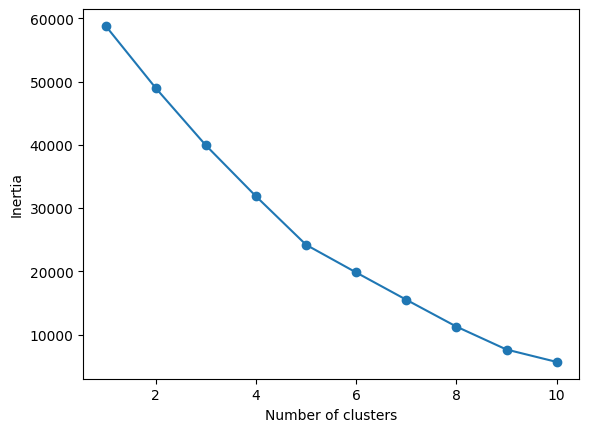

In [ ]:
# prompt: use kmeans to create an elbow plot using the columns sales_quantity	vegetables	fruits	dairy	seafood	frozen_meat	pet_care	pet_food	stationery	beauty_and_personal_care	wellness_food	wellness_products	baby_needs	sales_quantity_average

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
# Extract the relevant columns
data = category_df[['vegetables', 'fruits', 'dairy', 'seafood', 'frozen_meat', 'pet_care', 'pet_food', 'stationery', 'beauty_and_personal_care', 'wellness_food', 'wellness_products', 'baby_needs', 'sales_quantity_average','times_visited']]

# Normalize the data
data_normalized = scaler.fit_transform(data)

# Calculate inertia for different numbers of clusters
inertia = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(data_normalized)
  inertia.append(km.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
category_df.head()

,customer_code,sales_quantity,vegetables,fruits,dairy,seafood,frozen_meat,pet_care,pet_food,stationery,beauty_and_personal_care,wellness_food,wellness_products,baby_needs,NaN,time_difference_days,times_visited,sales_quantity_average
0,1,262.0,138.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175,26,6.730769
1,10,1146.0,0.0,0.0,0.0,797.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,52,3.423077
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483.0,0.0,0.0,0.0,0.0,172,26,6.615385
3,1000,69.0,24.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169,25,6.760000
4,1001,76.0,40.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,26,6.846154


dividing to clusters

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_normalized)
category_df['cluster'] = kmeans.labels_
category_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_code,sales_quantity,vegetables,fruits,dairy,seafood,frozen_meat,pet_care,pet_food,stationery,beauty_and_personal_care,wellness_food,wellness_products,baby_needs,NaN,time_difference_days,times_visited,sales_quantity_average,cluster
0,1,262.0,138.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175,26,6.730769,0
1,10,1146.0,0.0,0.0,0.0,797.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,52,3.423077,1
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483.0,0.0,0.0,0.0,0.0,172,26,6.615385,0
3,1000,69.0,24.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169,25,6.760000,0
4,1001,76.0,40.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178,26,6.846154,0


In [ ]:
# prompt: output category_df into a csv file

category_df.to_csv('category_df.csv')


plotting against clusters

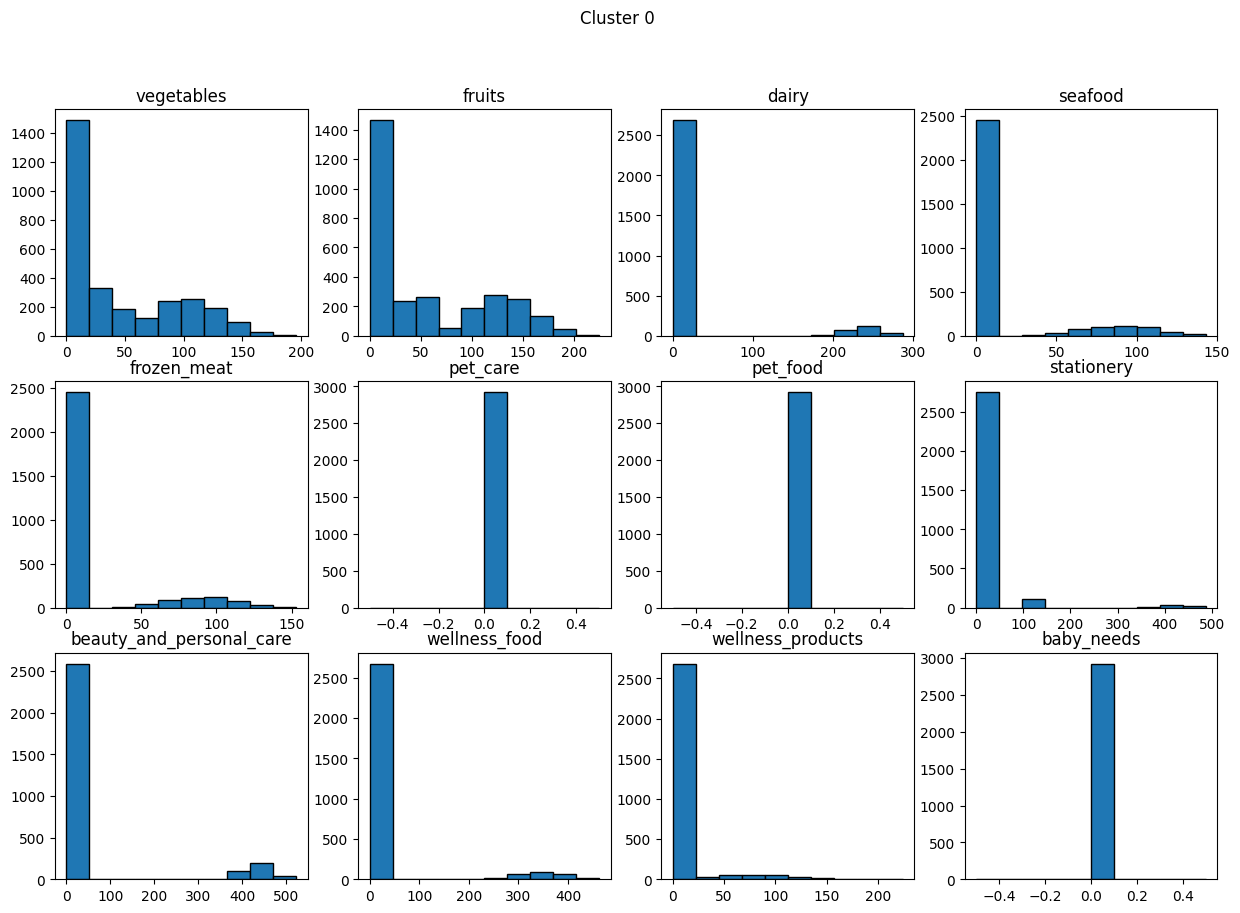

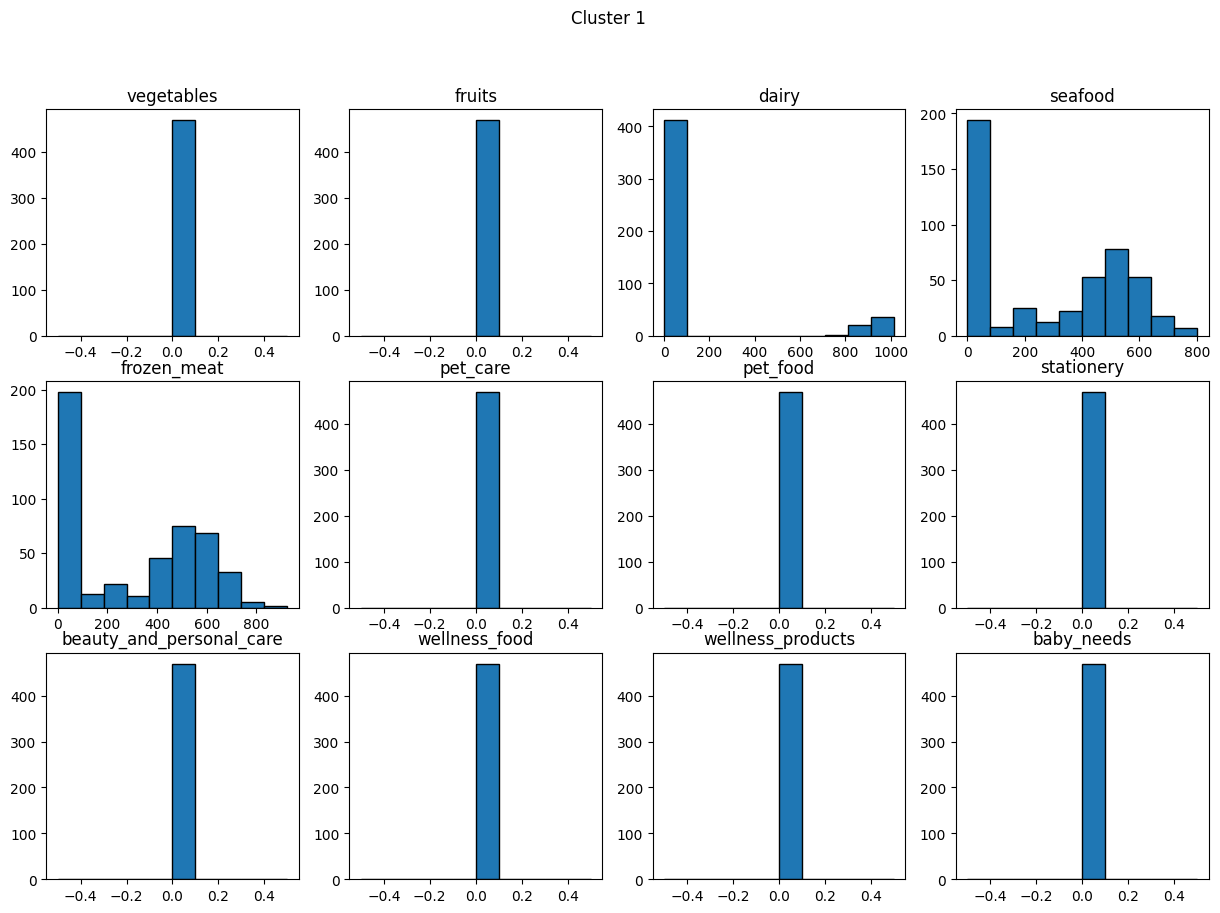

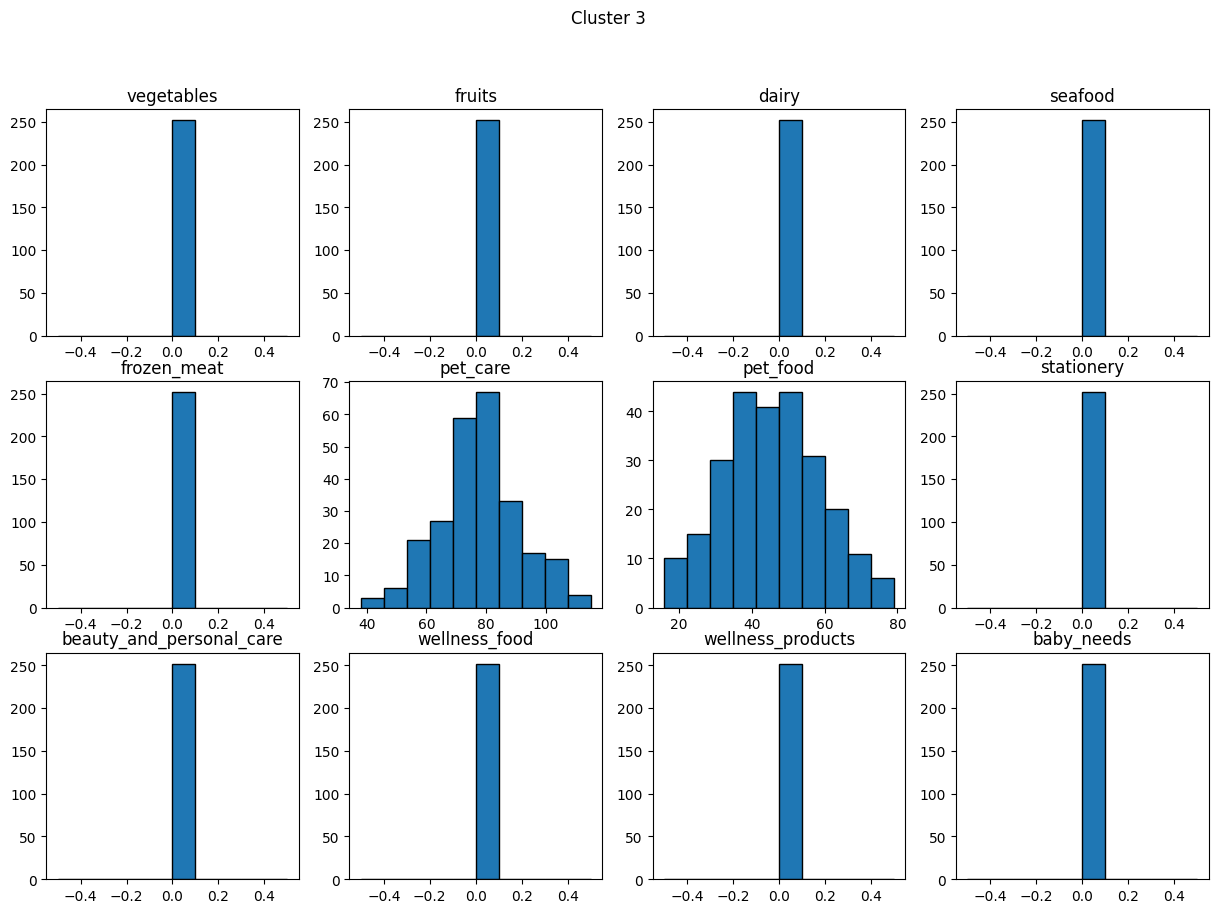

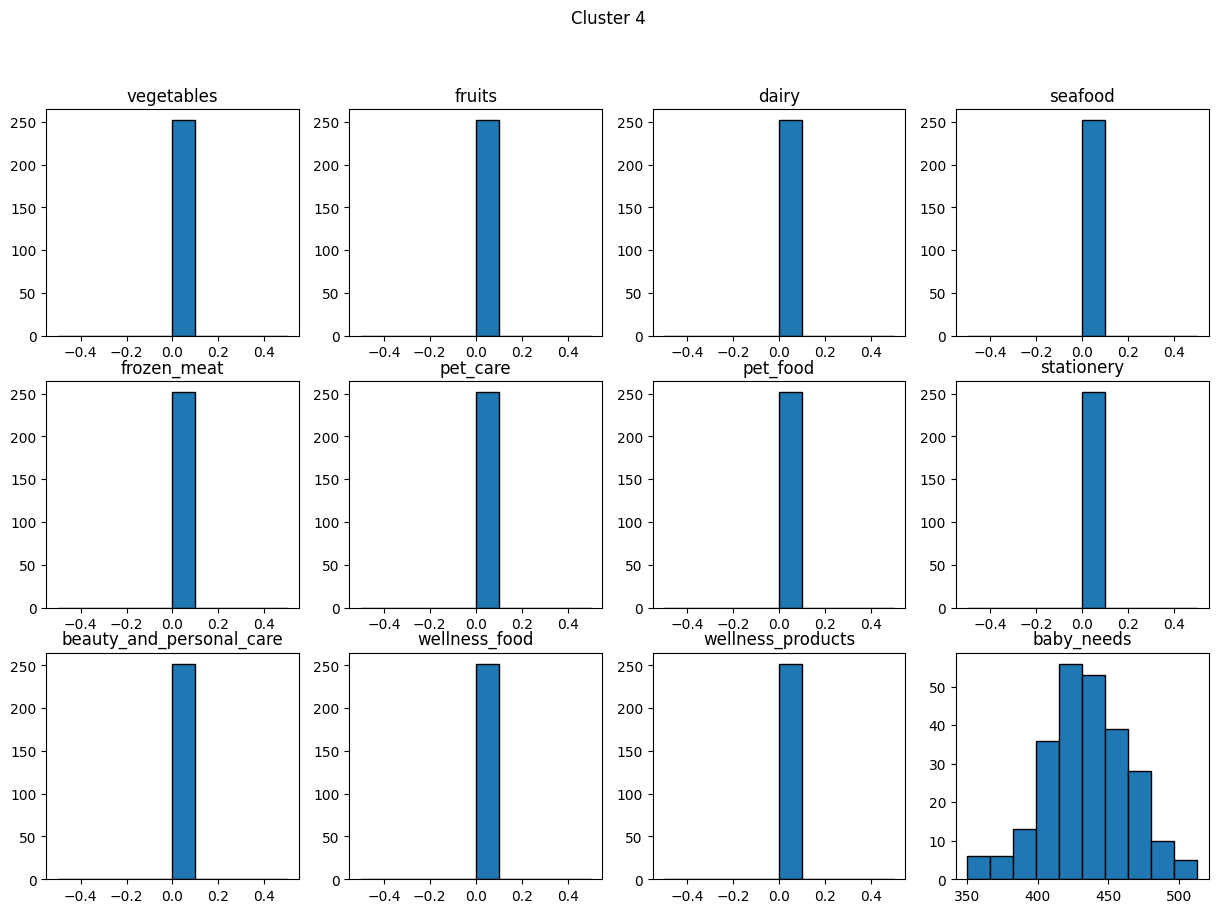

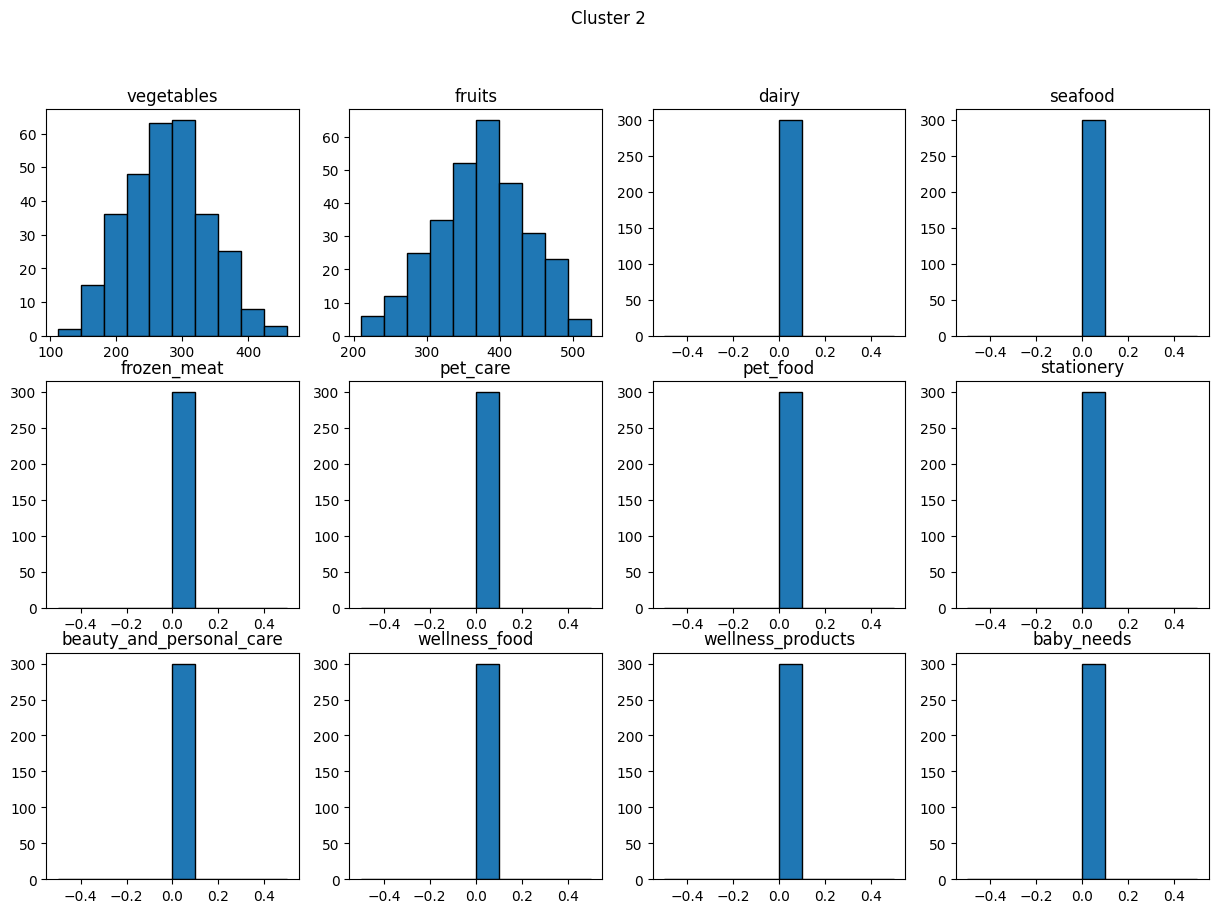

In [ ]:
# prompt: view each cluster in a histogram against columns vegetables	fruits	dairy	seafood	frozen_meat	pet_care	pet_food	stationery	beauty_and_personal_care	wellness_food	wellness_products	baby_needs

import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['vegetables', 'fruits', 'dairy', 'seafood', 'frozen_meat', 'pet_care', 'pet_food', 'stationery', 'beauty_and_personal_care', 'wellness_food', 'wellness_products', 'baby_needs']

# Get unique cluster labels
unique_clusters = category_df['cluster'].unique()

# Loop through each cluster
for cluster in unique_clusters:
  # Create a new DataFrame for the current cluster
  cluster_df = category_df[category_df['cluster'] == cluster]

  # Initialize the figure
  plt.figure(figsize=(15, 10))

  # Loop through each column and plot its histogram
  for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 4, i + 1)
    plt.hist(cluster_df[column], bins=10, edgecolor='black')
    plt.title(column)

  # Set the title for the current cluster
  plt.suptitle(f'Cluster {cluster}')

  # Display the plot
  plt.show()


# creating clusters based on item_name

In [ ]:
name_df.head()

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name
1,78,2023-01-12 08:08:00,item_cd_6,14.0,fresh,vegetables,beetroot
2,78,2023-01-17 12:15:00,item_cd_2,14.0,fresh,vegetables,potatoes
3,78,2023-01-25 16:37:00,item_cd_16,11.0,fresh,fruits,mango
4,78,2023-02-03 15:11:00,item_cd_3,14.0,fresh,vegetables,pumpkin
5,78,2023-02-08 12:56:00,item_cd_1,10.0,fresh,vegetables,carrot


In [ ]:
# prompt: i want to get the unique item_category as columns and enter the sales_quantity values in each column added to the same df.

import numpy as np
unique_names = name_df['item_name'].unique()
for name in unique_names:
  name_df[name] = np.where(name_df['item_name'] == name, name_df['sales_quantity'], 0)
name_df.head()

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,beetroot,potatoes,mango,...,green_tea_bags_25_pack,yoga_mat,smoothie_mix_6_packs,multivitamin_bottle,baby_diapers,silicon pacifiers,baby_shampoo,baby_cream,baby_soap,NaN
1,78,2023-01-12 08:08:00,item_cd_6,14.0,fresh,vegetables,beetroot,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78,2023-01-17 12:15:00,item_cd_2,14.0,fresh,vegetables,potatoes,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78,2023-01-25 16:37:00,item_cd_16,11.0,fresh,fruits,mango,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78,2023-02-03 15:11:00,item_cd_3,14.0,fresh,vegetables,pumpkin,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,78,2023-02-08 12:56:00,item_cd_1,10.0,fresh,vegetables,carrot,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:


# prompt: drop transaction_time,item code in category_df, department and combine all the rows having the same customer_code while adding the values in each column

# Drop unnecessary columns
name_df.drop(['transaction_time', 'item code', 'department','item_category','item_name'], axis=1, inplace=True)

# Combine rows with the same customer_code and sum the values
name_df = name_df.groupby('customer_code').sum()

# Print the first few rows of the resulting DataFrame



In [ ]:
name_df.head()

,sales_quantity,beetroot,potatoes,mango,pumpkin,carrot,fuji apple,capsicum,tomatoes,orange,...,green_tea_bags_25_pack,yoga_mat,smoothie_mix_6_packs,multivitamin_bottle,baby_diapers,silicon pacifiers,baby_shampoo,baby_cream,baby_soap,NaN
customer_code,,,,,,,,,,,,,,,,,,,,,
1,262.0,20.0,8.0,0.0,0.0,13.0,29.0,26.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,69.0,7.0,4.0,10.0,7.0,4.0,14.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,76.0,12.0,2.0,5.0,7.0,6.0,0.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
name_df = name_df.merge(time_df, on='customer_code', how='left')
name_df.head()

,customer_code,sales_quantity,beetroot,potatoes,mango,pumpkin,carrot,fuji apple,capsicum,tomatoes,...,yoga_mat,smoothie_mix_6_packs,multivitamin_bottle,baby_diapers,silicon pacifiers,baby_shampoo,baby_cream,baby_soap,NaN,times_visited
0,1,262.0,20.0,8.0,0.0,0.0,13.0,29.0,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
1,10,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
3,1000,69.0,7.0,4.0,10.0,7.0,4.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
4,1001,76.0,12.0,2.0,5.0,7.0,6.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26


In [ ]:
sales_average_df = category_df[['customer_code', 'sales_quantity_average']].drop_duplicates()
sales_average_df.head()

,customer_code,sales_quantity_average
0,1,6.730769
1,10,3.423077
2,100,6.615385
3,1000,6.760000
4,1001,6.846154


In [ ]:
name_df = name_df.merge(sales_average_df, on='customer_code', how='left')


In [ ]:
name_df.head()

,customer_code,sales_quantity,beetroot,potatoes,mango,pumpkin,carrot,fuji apple,capsicum,tomatoes,...,smoothie_mix_6_packs,multivitamin_bottle,baby_diapers,silicon pacifiers,baby_shampoo,baby_cream,baby_soap,NaN,times_visited,sales_quantity_average
0,1,262.0,20.0,8.0,0.0,0.0,13.0,29.0,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.730769
1,10,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,3.423077
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.615385
3,1000,69.0,7.0,4.0,10.0,7.0,4.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,6.760000
4,1001,76.0,12.0,2.0,5.0,7.0,6.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.846154


In [ ]:
name_df.columns

Index([                 'customer_code',                 'sales_quantity',
                             'beetroot',                       'potatoes',
                                'mango',                        'pumpkin',
                               'carrot',                     'fuji apple',
                             'capsicum',                       'tomatoes',
                               'orange',                      'pineapple',
                             'cucumber',                         'grapes',
                               'papaya',                         'banana',
                          'green apple',                    'green_beans',
                               'butter',                     'set yogurt',
                  'chocolate ice cream',                    'milk carton',
                      'drinking yogurt',                  'cheese slices',
                   'vanialla ice cream',                  'cheese wedges',
                         

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

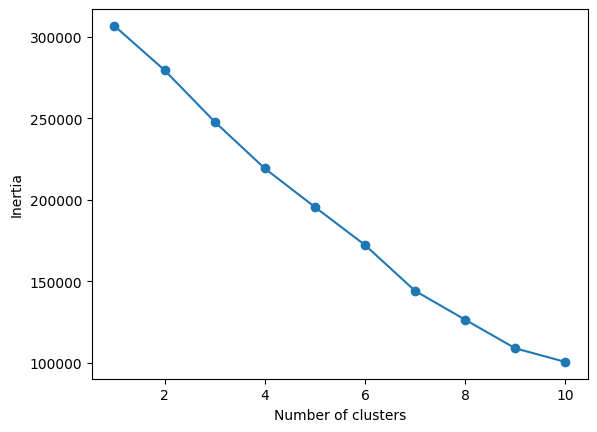

In [ ]:
# prompt: use kmeans to create an elbow plot using the columns sales_quantity	vegetables	fruits	dairy	seafood	frozen_meat	pet_care	pet_food	stationery	beauty_and_personal_care	wellness_food	wellness_products	baby_needs	sales_quantity_average

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
# Extract the relevant columns
data = name_df[['customer_code', 'beetroot', 'potatoes', 'mango',
       'pumpkin', 'carrot', 'fuji apple', 'capsicum', 'tomatoes', 'orange',
       'pineapple', 'cucumber', 'grapes', 'papaya', 'banana', 'green apple',
       'green_beans', 'butter', 'set yogurt', 'chocolate ice cream',
       'milk carton', 'drinking yogurt', 'cheese slices', 'vanialla ice cream',
       'cheese wedges', 'seer_fish', 'chicken_breast_slices_500g', 'prawns',
       'chicken_sausages_150g', 'tuna', 'sea crabs', 'chicken_meatballs_250g',
       'cuttlefish', 'beef_meatballs_200g', 'pork_bacon_500g', 'dog collar',
       'cat litter', 'slicker brush', 'cat food', 'dog leash', 'pet shampoo',
       'dog treats', 'chicken and liver treats', 'ballpoint_pens_blue_6_pc',
       'single_rule_cr_book_120p', 'glue_stick', 'highlighter_6_pack',
       'single_rule_exercise_book_120p', 'stapler_large',
       'a5_sprial_notebook_100p', 'pencils_hb_6_pc', 'whiteboard_marker_blue',
       'drawing_book_small_20pg', 'soap', 'perfume', 'body_wash',
       'conditioner', 'facial_cleanser', 'sunscreen', 'lip_balm', 'shampoo',
       'protein_bars', 'green_tea_bags_25_pack', 'yoga_mat',
       'smoothie_mix_6_packs', 'multivitamin_bottle', 'baby_diapers',
       'silicon pacifiers', 'baby_shampoo', 'baby_cream', 'baby_soap',
       'times_visited', 'sales_quantity_average']]

# Normalize the data
data_normalized = scaler.fit_transform(data)

# Calculate inertia for different numbers of clusters
inertia = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(data_normalized)
  inertia.append(km.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_normalized)
name_df['cluster'] = kmeans.labels_
name_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_code,sales_quantity,beetroot,potatoes,mango,pumpkin,carrot,fuji apple,capsicum,tomatoes,...,multivitamin_bottle,baby_diapers,silicon pacifiers,baby_shampoo,baby_cream,baby_soap,NaN,times_visited,sales_quantity_average,cluster
0,1,262.0,20.0,8.0,0.0,0.0,13.0,29.0,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.730769,0
1,10,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,3.423077,4
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.615385,5
3,1000,69.0,7.0,4.0,10.0,7.0,4.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,6.760000,0
4,1001,76.0,12.0,2.0,5.0,7.0,6.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.846154,0


In [ ]:
# prompt: get count of rows grouped by cluster

cluster_counts = name_df.groupby('cluster')['customer_code'].count()
print(cluster_counts)


cluster
0    3209
1      58
2      60
3     300
4     237
5     336
Name: customer_code, dtype: int64


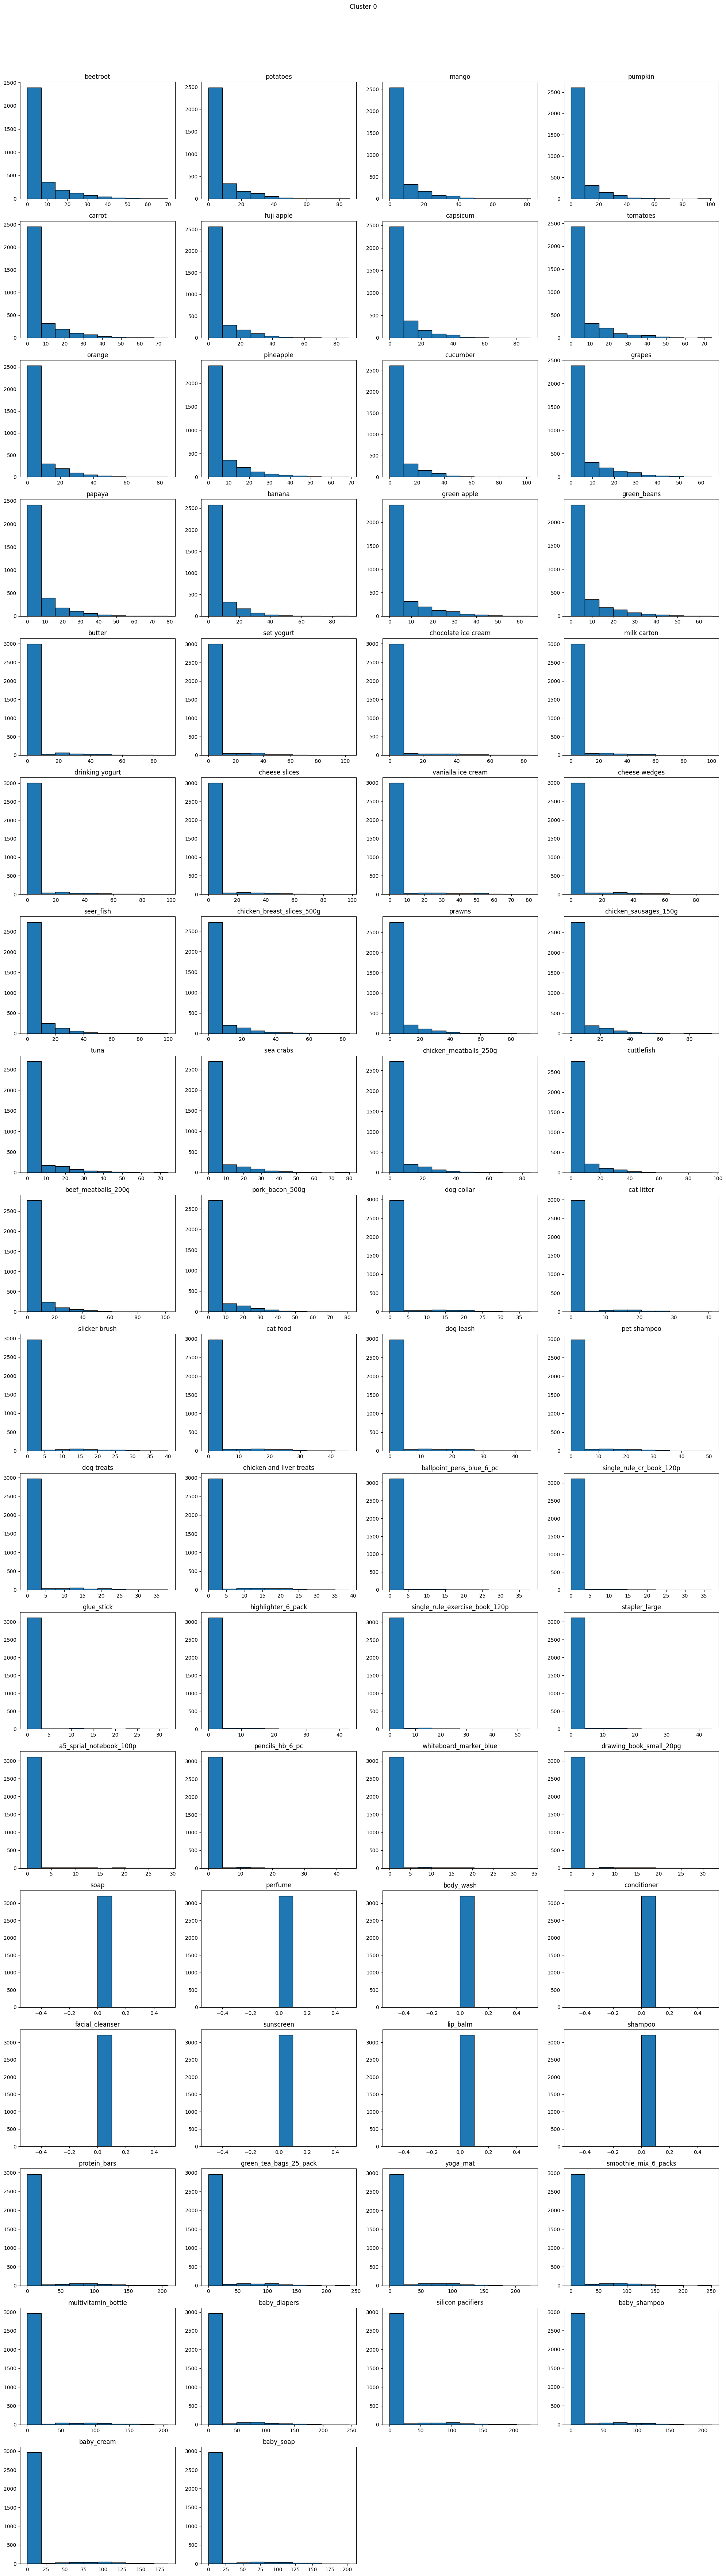

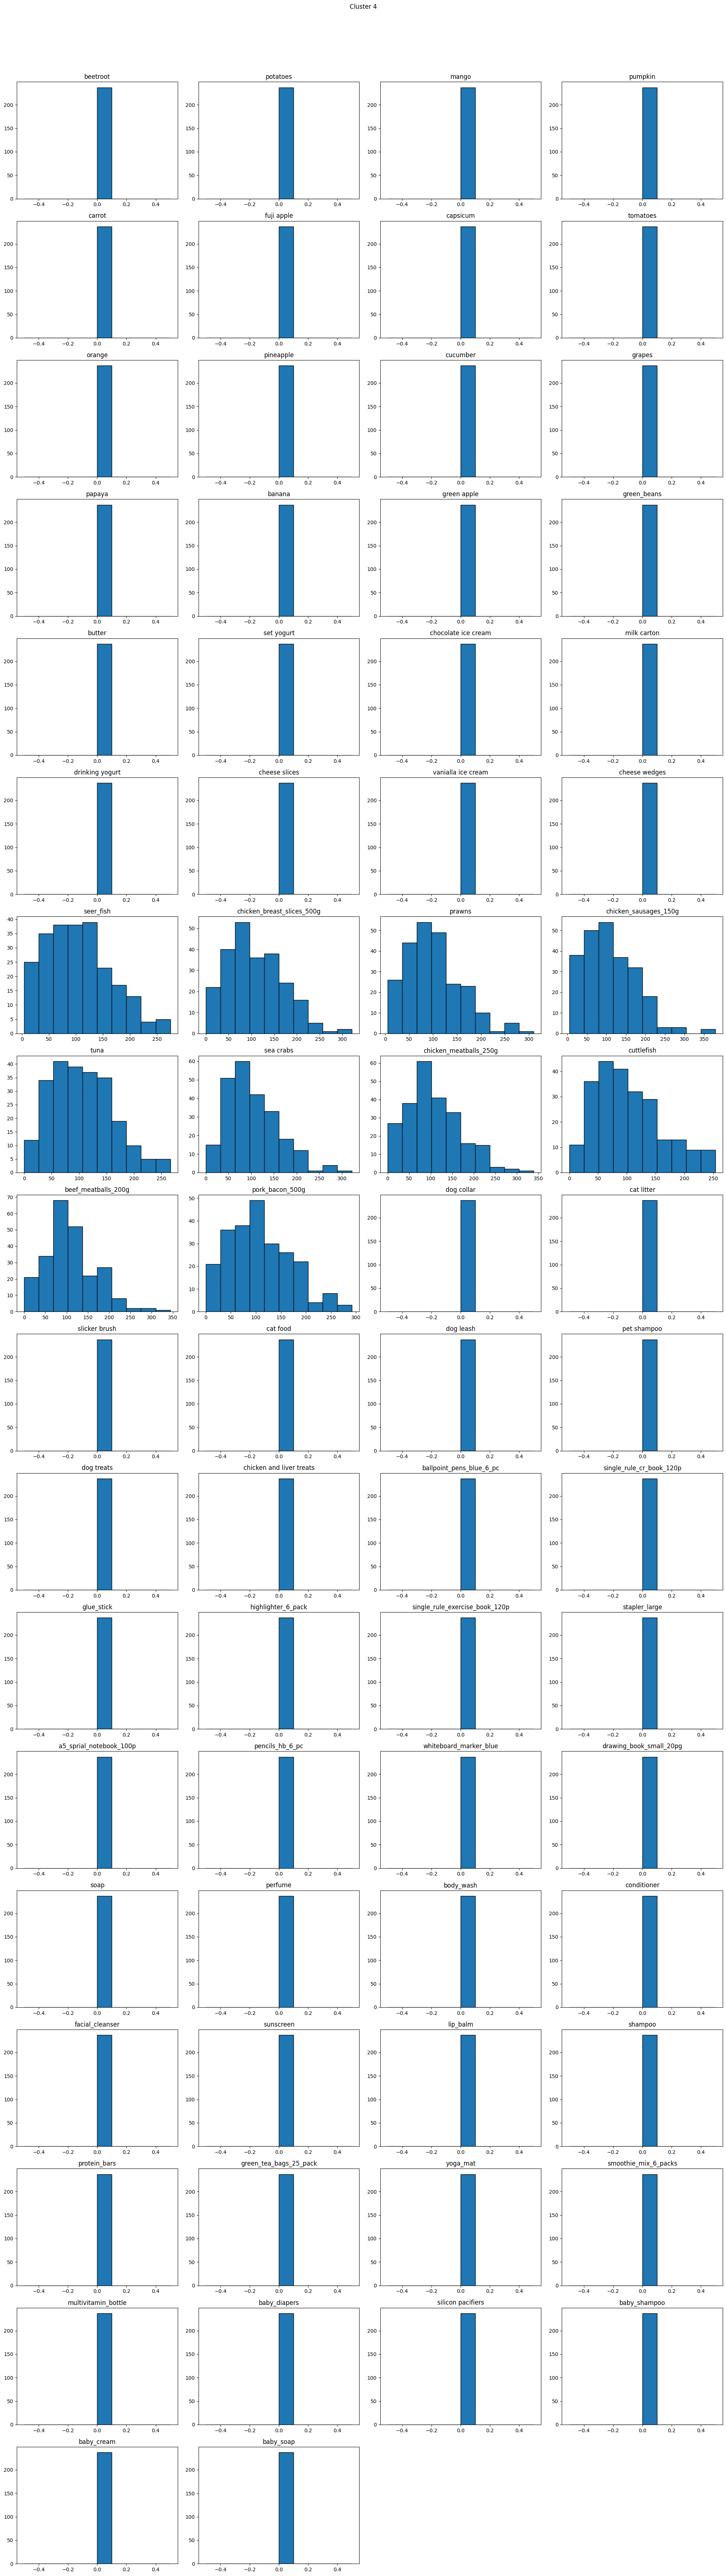

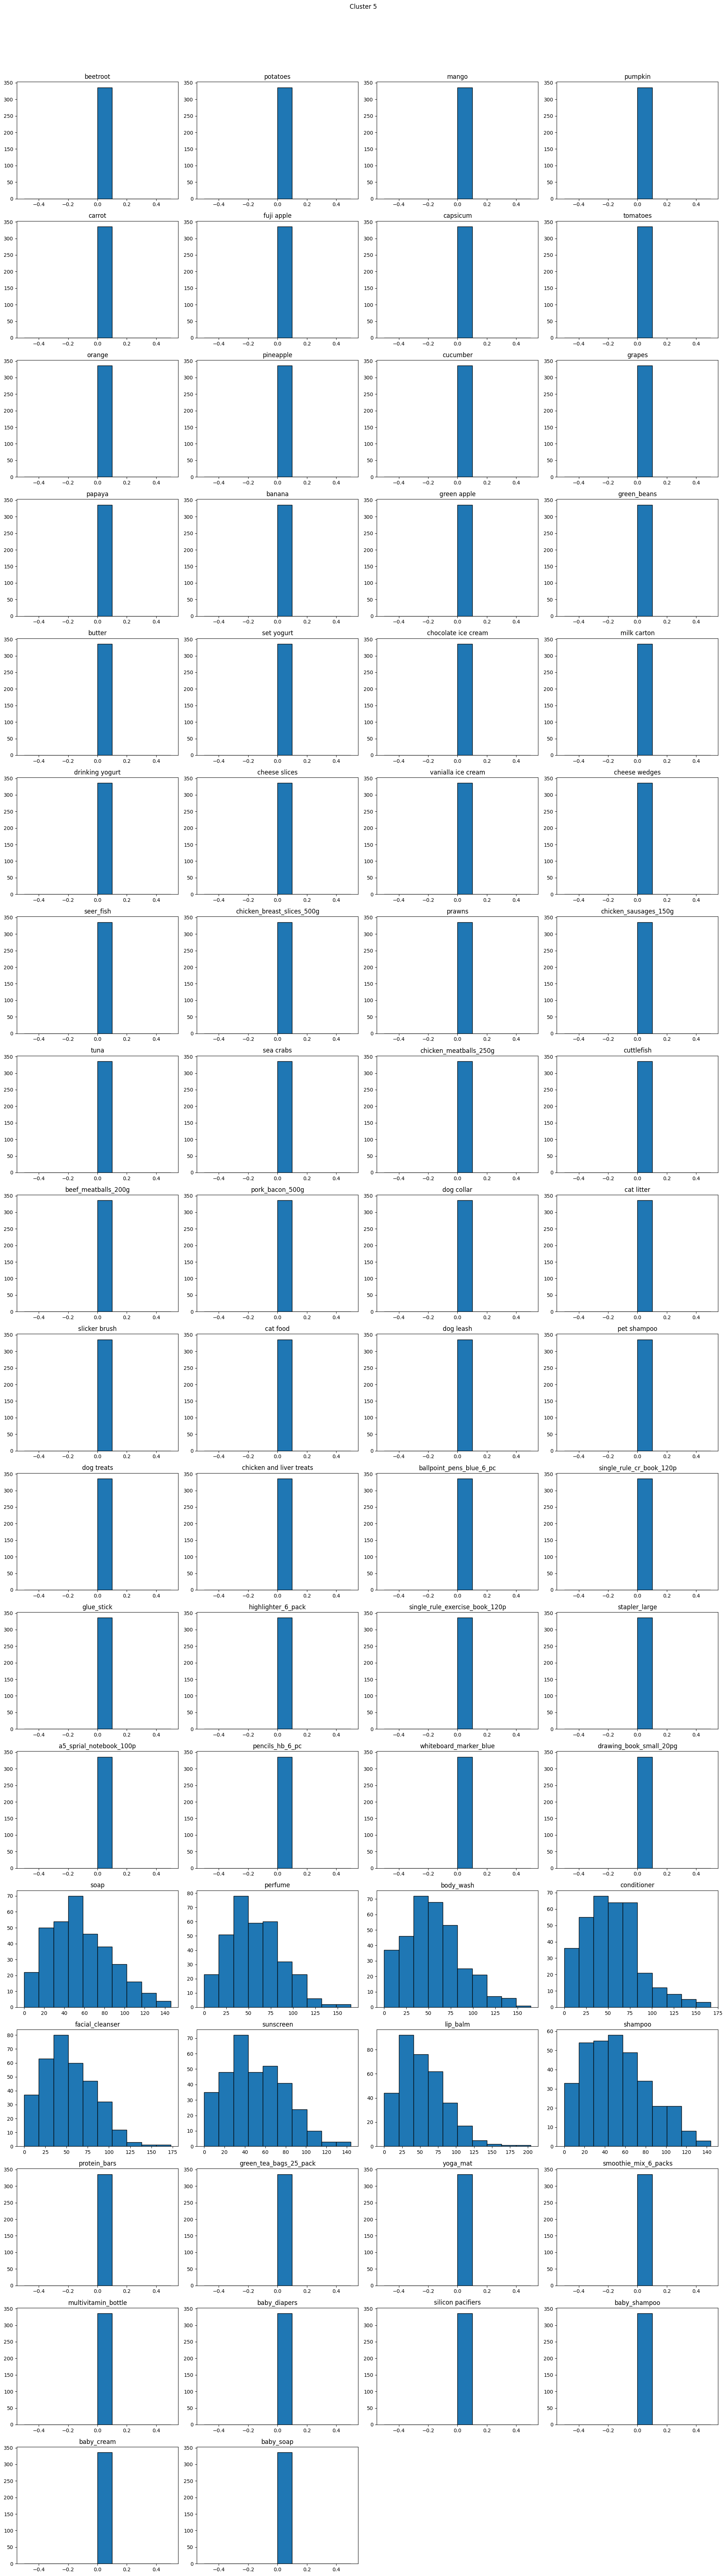

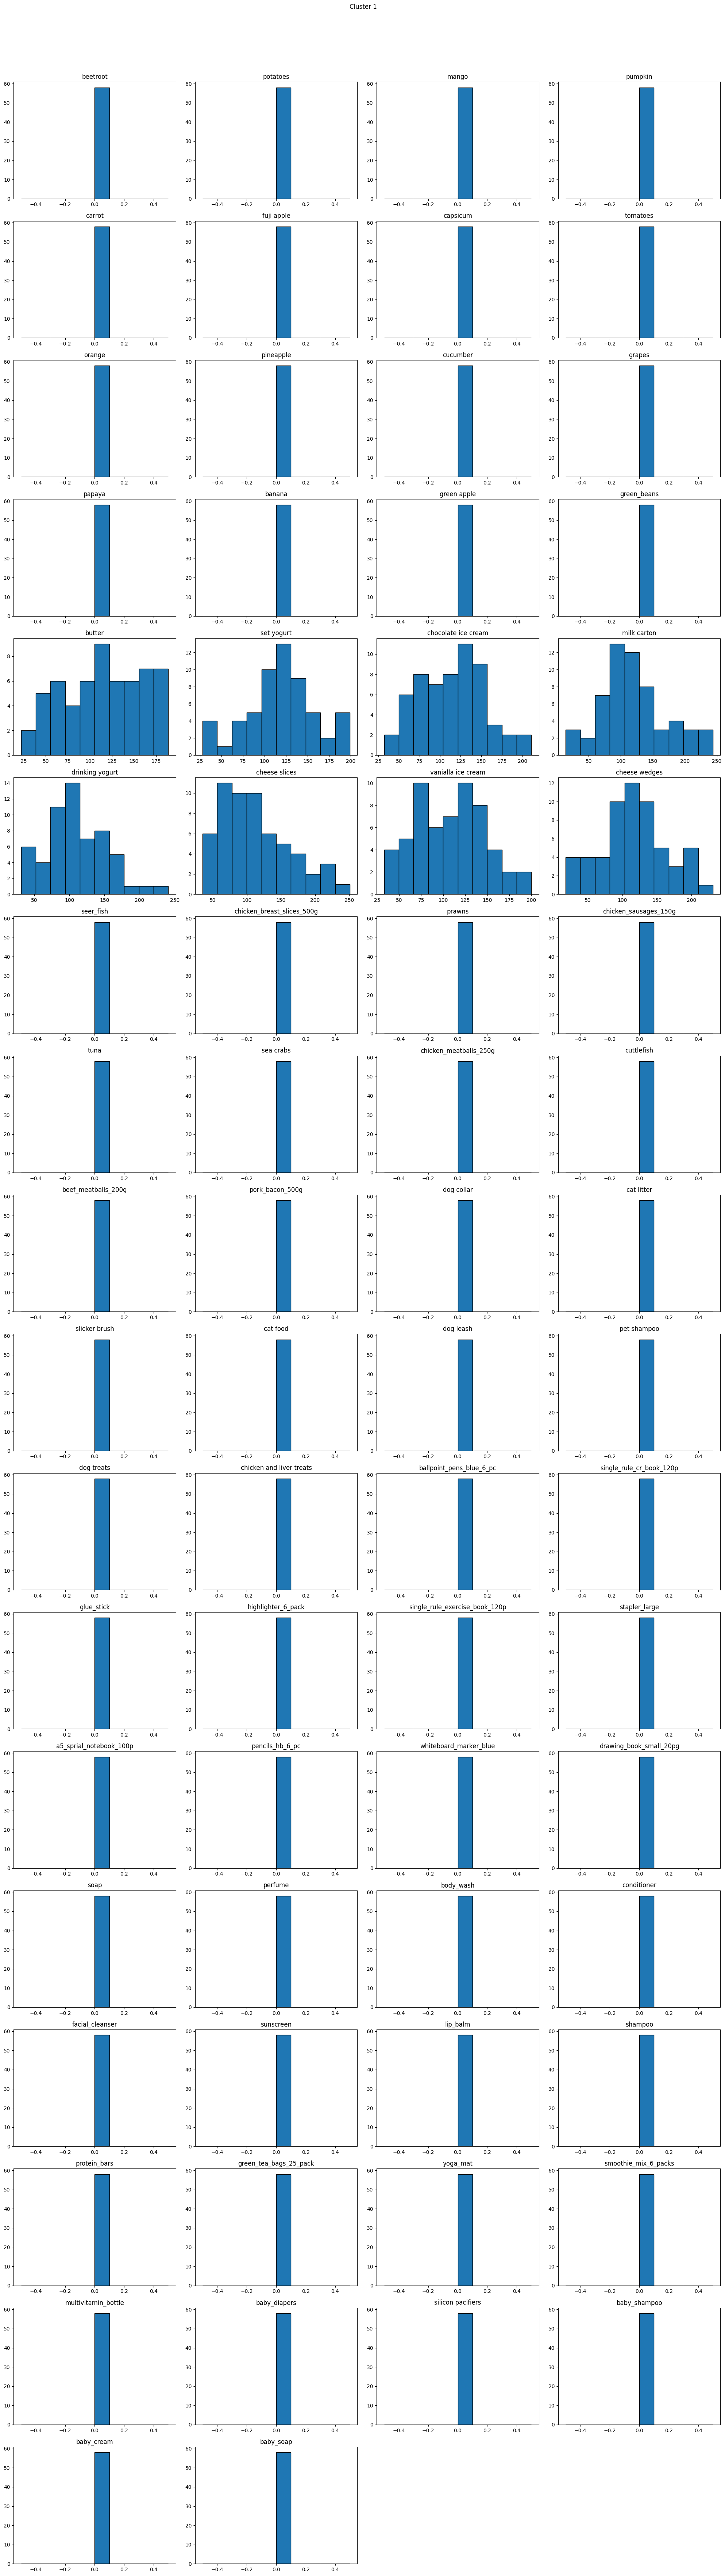

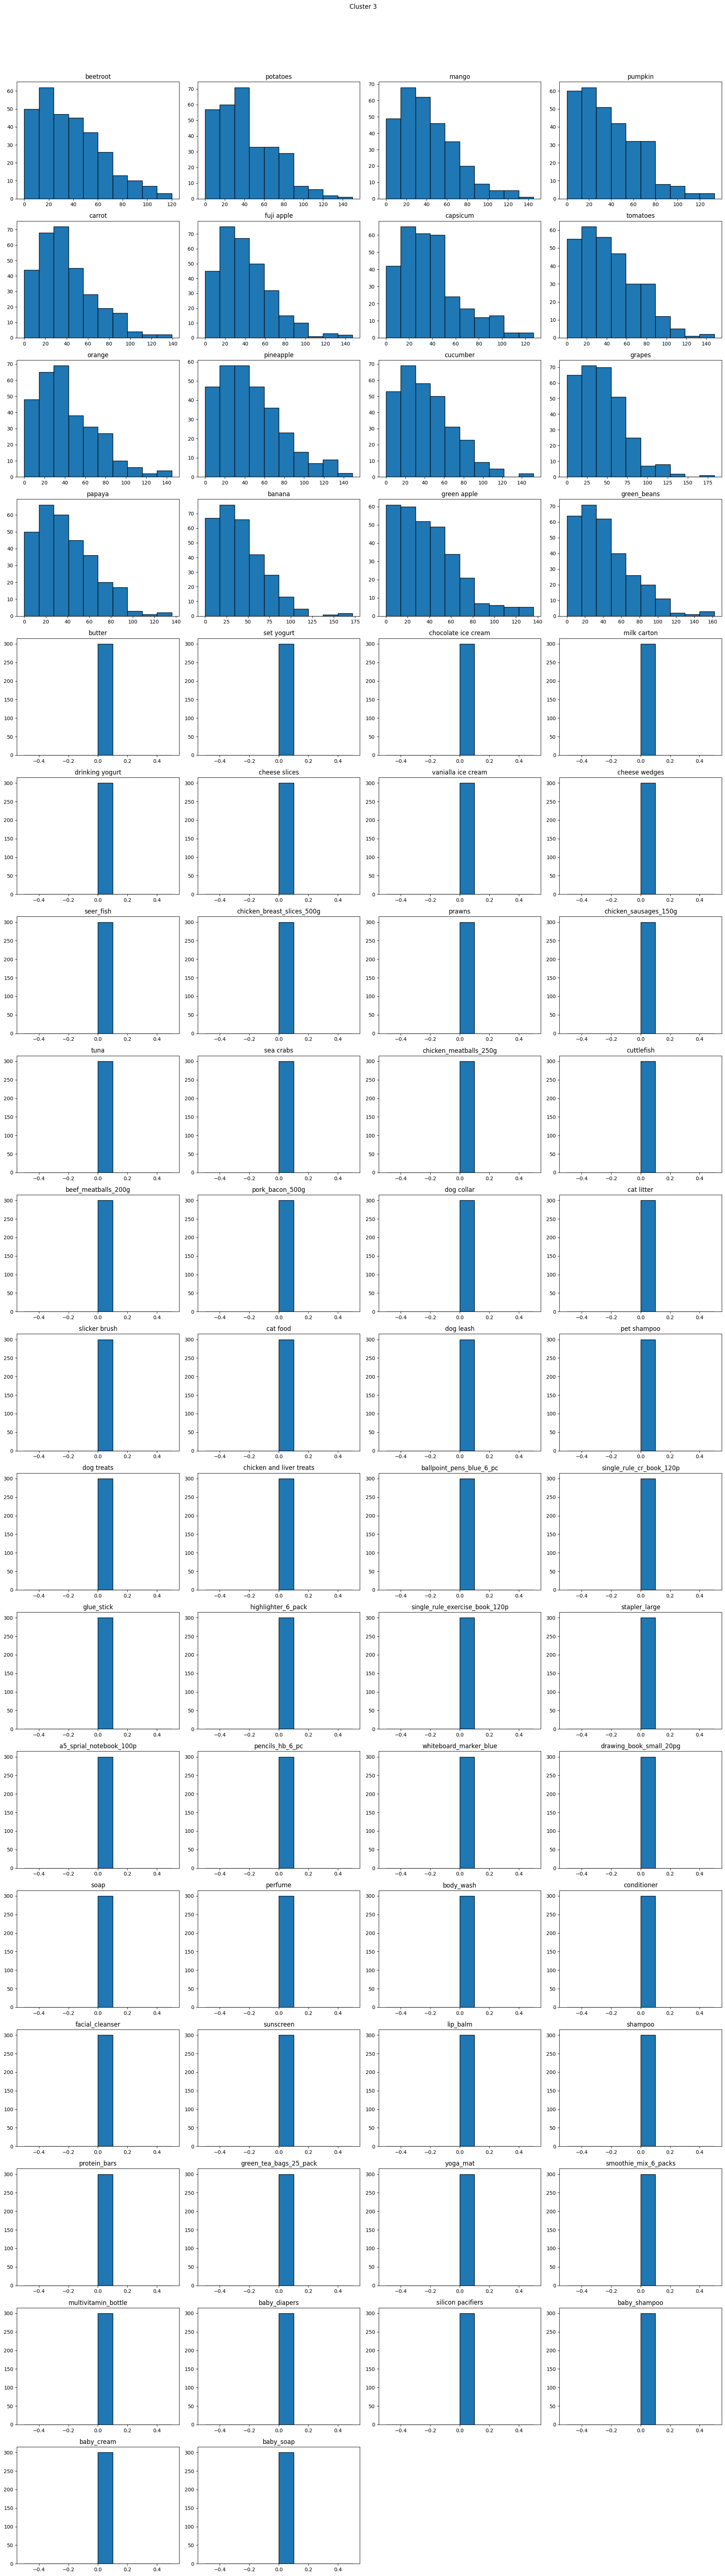

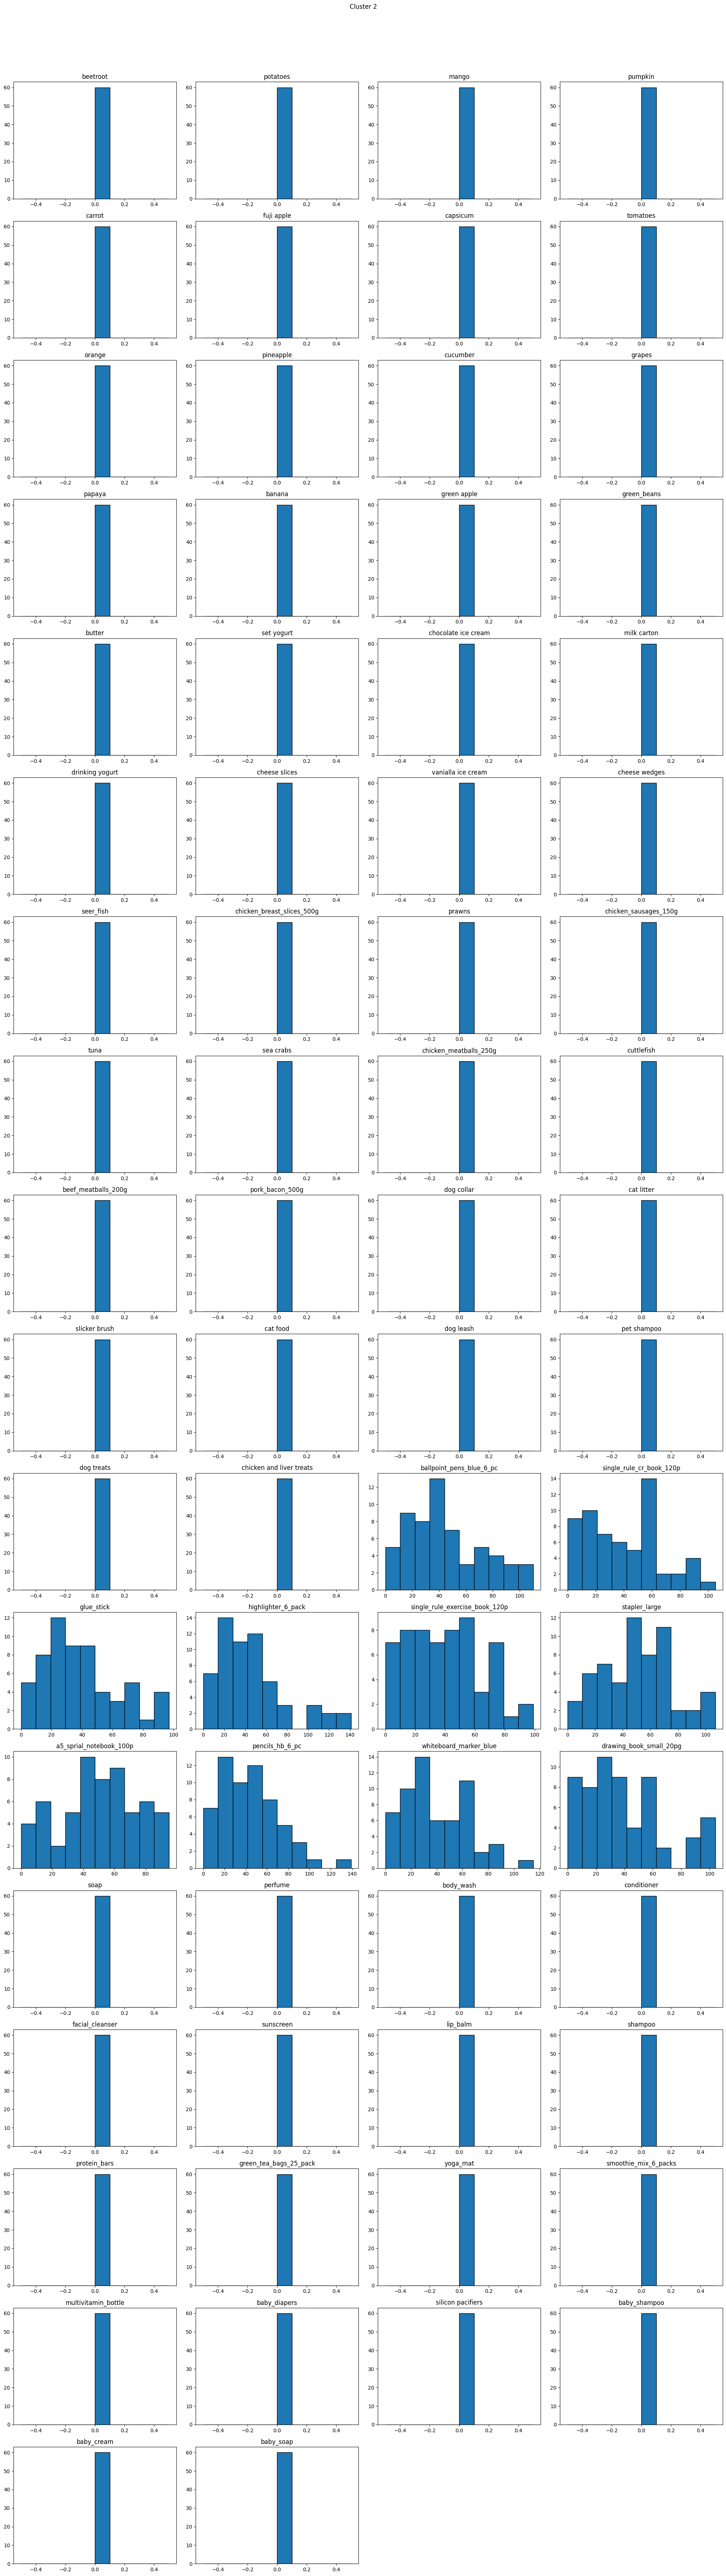

In [ ]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['beetroot', 'potatoes', 'mango',
       'pumpkin', 'carrot', 'fuji apple', 'capsicum', 'tomatoes', 'orange',
       'pineapple', 'cucumber', 'grapes', 'papaya', 'banana', 'green apple',
       'green_beans', 'butter', 'set yogurt', 'chocolate ice cream',
       'milk carton', 'drinking yogurt', 'cheese slices', 'vanialla ice cream',
       'cheese wedges', 'seer_fish', 'chicken_breast_slices_500g', 'prawns',
       'chicken_sausages_150g', 'tuna', 'sea crabs', 'chicken_meatballs_250g',
       'cuttlefish', 'beef_meatballs_200g', 'pork_bacon_500g', 'dog collar',
       'cat litter', 'slicker brush', 'cat food', 'dog leash', 'pet shampoo',
       'dog treats', 'chicken and liver treats', 'ballpoint_pens_blue_6_pc',
       'single_rule_cr_book_120p', 'glue_stick', 'highlighter_6_pack',
       'single_rule_exercise_book_120p', 'stapler_large',
       'a5_sprial_notebook_100p', 'pencils_hb_6_pc', 'whiteboard_marker_blue',
       'drawing_book_small_20pg', 'soap', 'perfume', 'body_wash',
       'conditioner', 'facial_cleanser', 'sunscreen', 'lip_balm', 'shampoo',
       'protein_bars', 'green_tea_bags_25_pack', 'yoga_mat',
       'smoothie_mix_6_packs', 'multivitamin_bottle', 'baby_diapers',
       'silicon pacifiers', 'baby_shampoo', 'baby_cream', 'baby_soap',
       ]

# Calculate the number of rows needed for the subplot grid
import math
num_columns = len(columns_to_plot)
num_rows = math.ceil(num_columns / 4)

# Get unique cluster labels
unique_clusters = name_df['cluster'].unique()

# Loop through each cluster
for cluster in unique_clusters:
    # Create a new DataFrame for the current cluster
    cluster_df = name_df[name_df['cluster'] == cluster]

    # Initialize the figure
    plt.figure(figsize=(20, 4 * num_rows))  # Adjust figure size to fit all subplots

    # Loop through each column and plot its histogram
    for i, column in enumerate(columns_to_plot):
        plt.subplot(num_rows, 4, i + 1)
        plt.hist(cluster_df[column], bins=10, edgecolor='black')
        plt.title(column)

    # Set the title for the current cluster
    plt.suptitle(f'Cluster {cluster}')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Display the plot
    plt.show()


In [ ]:
department_df.head()

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name
1,78,2023-01-12 08:08:00,item_cd_6,14,fresh,vegetables,beetroot
2,78,2023-01-17 12:15:00,item_cd_2,14,fresh,vegetables,potatoes
3,78,2023-01-25 16:37:00,item_cd_16,11,fresh,fruits,mango
4,78,2023-02-03 15:11:00,item_cd_3,14,fresh,vegetables,pumpkin
5,78,2023-02-08 12:56:00,item_cd_1,10,fresh,vegetables,carrot


In [ ]:
# prompt: i want to get the unique item_category as columns and enter the sales_quantity values in each column added to the same df.

import numpy as np
unique_names = department_df['department'].unique()
for name in unique_names:
  department_df[name] = np.where(department_df['department'] == name, department_df['sales_quantity'], 0)
department_df.head()

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,fresh,animal products,pet_products,homeware,Hygiene,lifestyle,household
1,78,2023-01-12 08:08:00,item_cd_6,14,fresh,vegetables,beetroot,14,0,0,0,0,0,0
2,78,2023-01-17 12:15:00,item_cd_2,14,fresh,vegetables,potatoes,14,0,0,0,0,0,0
3,78,2023-01-25 16:37:00,item_cd_16,11,fresh,fruits,mango,11,0,0,0,0,0,0
4,78,2023-02-03 15:11:00,item_cd_3,14,fresh,vegetables,pumpkin,14,0,0,0,0,0,0
5,78,2023-02-08 12:56:00,item_cd_1,10,fresh,vegetables,carrot,10,0,0,0,0,0,0


In [ ]:


# prompt: drop transaction_time,item code in category_df, department and combine all the rows having the same customer_code while adding the values in each column

# Drop unnecessary columns
# department_df.drop(['transaction_time', 'item code', 'department','item_category','item_name'], axis=1, inplace=True)

# Combine rows with the same customer_code and sum the values
department_df = department_df.groupby('customer_code').sum()

# Print the first few rows of the resulting DataFrame



In [ ]:
department_df.head()

,sales_quantity,fresh,animal products,pet_products,homeware,Hygiene,lifestyle,household
customer_code,,,,,,,,
1,1031,898,64,0,22,26,20,1
10,2685,71,2545,0,22,26,20,1
100,1475,71,64,0,22,1297,20,1
1000,433,300,64,0,22,26,20,1
1001,445,312,64,0,22,26,20,1


In [ ]:
department_df = department_df.merge(time_df, on='customer_code', how='left')
department_df.head()

,customer_code,sales_quantity,fresh,animal products,pet_products,homeware,Hygiene,lifestyle,household,times_visited
0,1,1031,898,64,0,22,26,20,1,142
1,10,2685,71,2545,0,22,26,20,1,171
2,100,1475,71,64,0,22,1297,20,1,145
3,1000,433,300,64,0,22,26,20,1,144
4,1001,445,312,64,0,22,26,20,1,144


,customer_code,sales_quantity,fresh,animal products,pet_products,homeware,Hygiene,lifestyle,household,times_visited,sales_quantity_average
0,1,1031,898,64,0,22,26,20,1,142,1.239437
1,10,2685,71,2545,0,22,26,20,1,171,1.046784
2,100,1475,71,64,0,22,1297,20,1,145,1.234483
3,1000,433,300,64,0,22,26,20,1,144,1.243056
4,1001,445,312,64,0,22,26,20,1,144,1.243056


In [ ]:
# prompt: i want to convert department_df into department.csv

department_df.to_csv('department.csv')


,customer_code,sales_quantity,beetroot,potatoes,mango,pumpkin,carrot,fuji apple,capsicum,tomatoes,...,multivitamin_bottle,baby_diapers,silicon pacifiers,baby_shampoo,baby_cream,baby_soap,NaN,times_visited,sales_quantity_average,cluster
0,1,262.0,20.0,8.0,0.0,0.0,13.0,29.0,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.730769,0
1,10,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,3.423077,4
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.615385,5
3,1000,69.0,7.0,4.0,10.0,7.0,4.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,6.760000,0
4,1001,76.0,12.0,2.0,5.0,7.0,6.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.846154,0


In [ ]:
name_df.head()

,customer_code,sales_quantity,beetroot,potatoes,mango,pumpkin,carrot,fuji apple,capsicum,tomatoes,...,multivitamin_bottle,baby_diapers,silicon pacifiers,baby_shampoo,baby_cream,baby_soap,NaN,times_visited,sales_quantity_average,cluster
0,1,262.0,20.0,8.0,0.0,0.0,13.0,29.0,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.730769,0
1,10,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,3.423077,4
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.615385,5
3,1000,69.0,7.0,4.0,10.0,7.0,4.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,6.760000,0
4,1001,76.0,12.0,2.0,5.0,7.0,6.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,6.846154,0


In [ ]:
name_df.columns

Index([                 'customer_code',                 'sales_quantity',
                             'beetroot',                       'potatoes',
                                'mango',                        'pumpkin',
                               'carrot',                     'fuji apple',
                             'capsicum',                       'tomatoes',
                               'orange',                      'pineapple',
                             'cucumber',                         'grapes',
                               'papaya',                         'banana',
                          'green apple',                    'green_beans',
                               'butter',                     'set yogurt',
                  'chocolate ice cream',                    'milk carton',
                      'drinking yogurt',                  'cheese slices',
                   'vanialla ice cream',                  'cheese wedges',
                         

In [ ]:
# prompt: from name_df remove 'cluster' 'sales_quantity_average' 'nan' 'times_visited'

# name_df = name_df.drop(['cluster', 'sales_quantity_average', 'times_visited'], axis=1)


In [ ]:
name_df.head()

,customer_code,sales_quantity,beetroot,potatoes,mango,pumpkin,carrot,fuji apple,capsicum,tomatoes,...,green_tea_bags_25_pack,yoga_mat,smoothie_mix_6_packs,multivitamin_bottle,baby_diapers,silicon pacifiers,baby_shampoo,baby_cream,baby_soap,NaN
0,1,262.0,20.0,8.0,0.0,0.0,13.0,29.0,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000,69.0,7.0,4.0,10.0,7.0,4.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1001,76.0,12.0,2.0,5.0,7.0,6.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:

# Drop 'NaN' column if present (assuming it's not needed)
name_df = name_df.drop(columns=['NaN','sales_quantity'], errors='ignore')

# Group by customer_code and get the top 5 items based on sales_quantity
top_items_per_customer = (
    name_df.set_index('customer_code')
    .apply(lambda x: x.nlargest(5).index.tolist(), axis=1)
    .reset_index(name='top_5_items')
)

# Display the result
top_items_per_customer

,customer_code,top_5_items
0,1,"[cucumber, papaya, fuji apple, capsicum, orange]"
1,10,"[seer_fish, prawns, cuttlefish, tuna, sea crabs]"
2,100,"[conditioner, facial_cleanser, sunscreen, lip_..."
3,1000,"[fuji apple, mango, green apple, beetroot, pum..."
4,1001,"[papaya, beetroot, cucumber, green apple, pump..."
...,...,...
4195,995,"[perfume, sunscreen, conditioner, facial_clean..."
4196,996,"[sunscreen, conditioner, perfume, soap, facial..."
4197,997,"[pumpkin, cucumber, carrot, papaya, banana]"
4198,998,"[pumpkin, grapes, potatoes, green_beans, tomat..."


In [96]:
# prompt: output top_items_per_customer into a csv file

top_items_per_customer.to_csv('top_items_per_customer.csv')
